# Normalization research

```Read the following ideas about data normalization. Use the data given to you to demonstrate these ideas on a real dataset.```

```Why use normalization?```
- ```Normalization before using any dimensionality reduction algorithm (for example, PCA), is extremely important.```
- ```You might want to use different normalizers when using different kinds of clustering methods. For example, when expecting to find 'long' (elliptic) clusters while using Kmeans, you should normalize the data so the clusters will be more "round". What can you do when clusters have different "orientation" in the vector space?```
- ```Normalize the data before training. You can hope to achieve two purposes:```
    - ```Get rid of anomalies, usually by clipping of some sort.```
    - ```Scale the data to fit into algorithms such as linear regression or neural network.```
    
```Normalizing methods I would recommend to examine:```
- ```sklearn.preprocessing.StandardScaler```
- ```sklearn.preprocessing.MinMaxScaler```
- ```np.clip```
- ```np.log10```
- ```df.rank()/float(len(df)) (percentiles normalization, or transforming into a uniform distribution)```

```Try thinking about normalization as methods to change the distribution of your data. What kinds of distributions would you rather work with? Can you think of disadvantages of changing the distribution (think about data which is clustered)?```

```Think about the natural way to compute distance between two "points in a distribution". How can you use normalization to compute the distance fast?```

~```Ittai Haran```

In [2]:
import pandas as pd

df = pd.read_csv('resources/data.csv')

In [3]:
df.shape

(681349, 5)

In [8]:
import matplotlib.pyplot as plt

def describe_data(df, log_scale=True):
    for feature in df.columns:
        plt.hist(df[feature])
        if log_scale is True:
            plt.yscale('log')
        plt.show()
        plt.close()

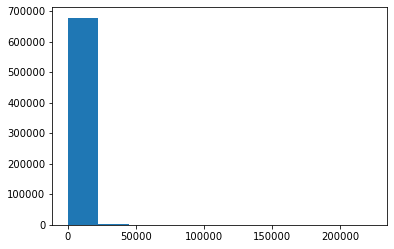

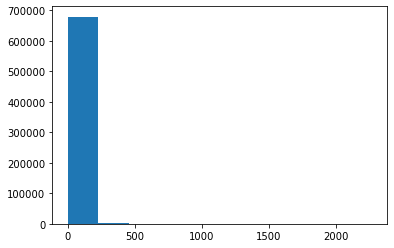

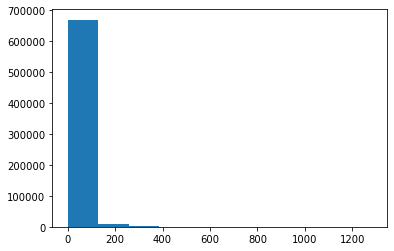

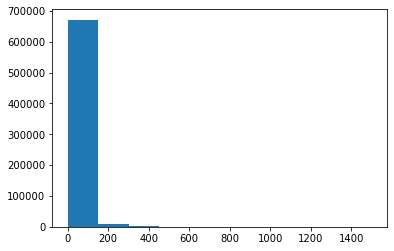

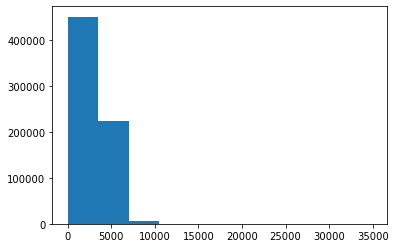

In [24]:
describe_data(df, log_scale=False)

In [6]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5
count,681349.000000,681349.000000,681349.000000,681349.000000,681349.000000
mean,1666.673835,13.811707,15.548901,17.371848,2759.302734
std,3761.472675,29.786061,37.056527,40.422788,1898.812091
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,156.550000,1.490400,0.930600,1.105400,1592.726335
50%,565.740000,4.843100,4.148100,4.892400,3173.119670
75%,1690.530000,13.871200,15.123300,17.281200,4751.604405
max,223287.840000,2270.682200,1283.078300,1502.867800,34916.968405


In [27]:
from keras.layers import Input, Dense
from keras.models import Model

def plot_autoencoder(X):
    input_layer = Input(shape = (5,))
    d_1 = Dense(16, activation='tanh')(input_layer)
    d_2 = Dense(8, activation='tanh')(d_1)
    d_3 = Dense(2, activation='linear')(d_2)

    model_encoder = Model(inputs = [input_layer], outputs = [d_3])

    d_4 = Dense(4, activation='tanh')(d_3)
    d_5 = Dense(8, activation='tanh')(d_4)
    d_6 = Dense(16, activation='linear')(d_5)
    output_layer = Dense(1)(d_6)

    model_autoencoder = Model(inputs = [input_layer], outputs = [output_layer])
    
    model_autoencoder.compile(optimizer='Adam', loss='mse')
    model_autoencoder.fit(X, X, epochs = 10, batch_size=1024)
    
    data_to_plot = model_encoder.predict(X)
    
    plt.scatter(data_to_plot[:, 0], data_to_plot[:, 1])

In [38]:
from sklearn.decomposition import PCA

def plot_pca(X):
    pca = PCA(n_components=2)
    data_to_plot = pca.fit_transform(X)
    
    plt.scatter(data_to_plot[:, 0], data_to_plot[:, 1])

In [13]:
def describe_data_numpy(X, log_scale=True):
    for i in range(X.shape[1]):
        plt.hist(X[:, i])
        if log_scale is True:
            plt.yscale('log')
        plt.show()
        plt.close()

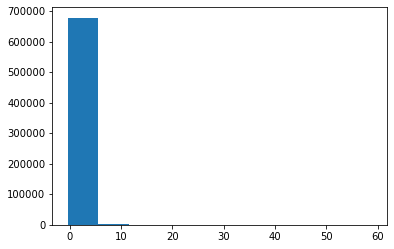

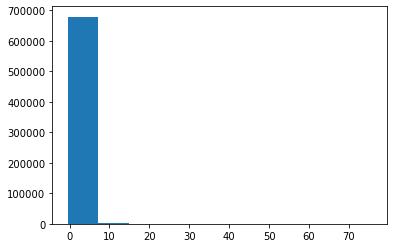

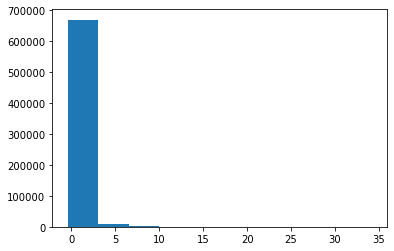

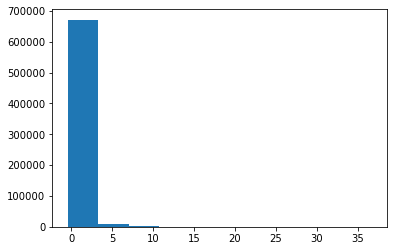

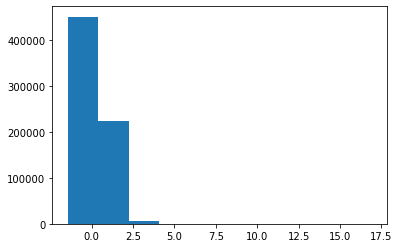

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_StandardScaler = scaler.fit_transform(df)

describe_data_numpy(X_StandardScaler, log_scale=False)

Epoch 1/10
666/666 [==============================] - 1s 1ms/step - loss: 0.3583
Epoch 2/10
666/666 [==============================] - 1s 844us/step - loss: 0.2799 0s - loss:
Epoch 3/10
666/666 [==============================] - 1s 840us/step - loss: 0.2723
Epoch 4/10
666/666 [==============================] - 1s 994us/step - loss: 0.2697
Epoch 5/10
666/666 [==============================] - 1s 829us/step - loss: 0.2682
Epoch 6/10
666/666 [==============================] - 1s 834us/step - loss: 0.2671
Epoch 7/10
666/666 [==============================] - 1s 847us/step - loss: 0.2667
Epoch 8/10
666/666 [==============================] - 1s 854us/step - loss: 0.2664
Epoch 9/10
666/666 [==============================] - 1s 833us/step - loss: 0.2661
Epoch 10/10
666/666 [==============================] - 1s 844us/step - loss: 0.2658


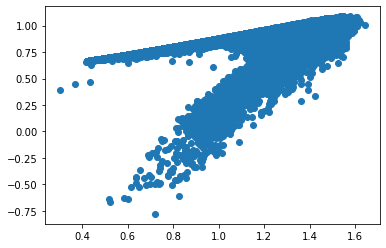

In [28]:
plot_autoencoder(X_StandardScaler)

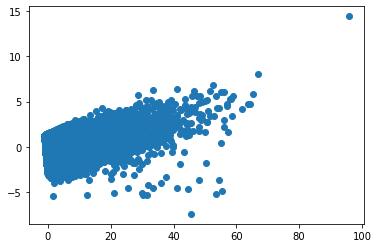

In [39]:
plot_pca(X_StandardScaler)

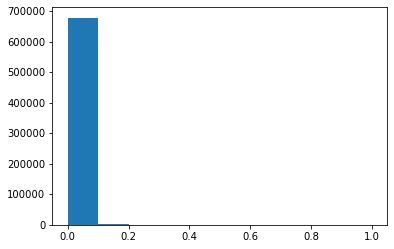

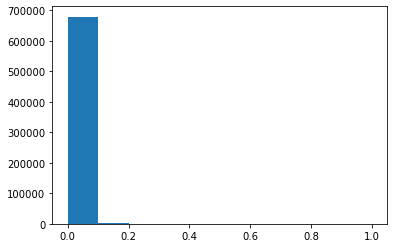

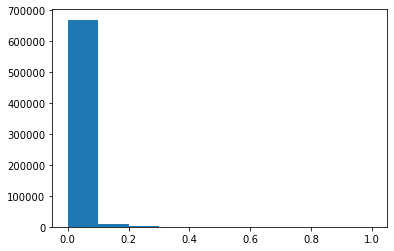

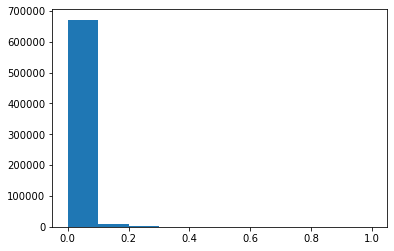

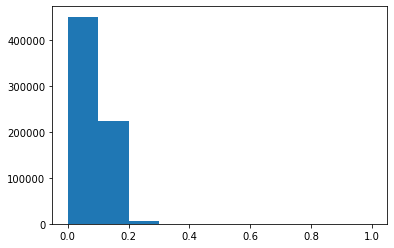

In [16]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_MinMaxScaler = scaler.fit_transform(df)

describe_data_numpy(X_MinMaxScaler, log_scale=False)

Epoch 1/10
666/666 [==============================] - 1s 863us/step - loss: 0.0013
Epoch 2/10
666/666 [==============================] - 1s 869us/step - loss: 0.0013
Epoch 3/10
666/666 [==============================] - 1s 877us/step - loss: 0.0013
Epoch 4/10
666/666 [==============================] - 1s 837us/step - loss: 0.0013
Epoch 5/10
666/666 [==============================] - 1s 834us/step - loss: 0.0013
Epoch 6/10
666/666 [==============================] - 1s 855us/step - loss: 0.0013
Epoch 7/10
666/666 [==============================] - 1s 828us/step - loss: 0.0013
Epoch 8/10
666/666 [==============================] - 1s 843us/step - loss: 0.0013
Epoch 9/10
666/666 [==============================] - 1s 839us/step - loss: 0.0013
Epoch 10/10
666/666 [==============================] - 1s 831us/step - loss: 0.0013


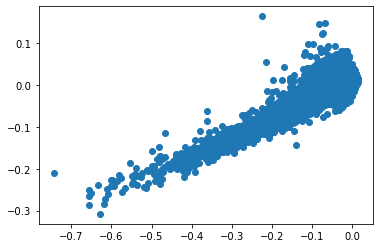

In [29]:
plot_autoencoder(X_MinMaxScaler)

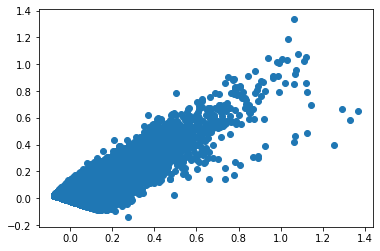

In [40]:
plot_pca(X_MinMaxScaler)

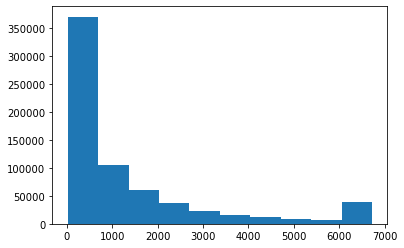

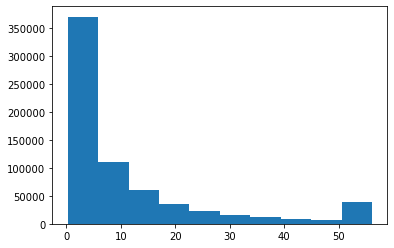

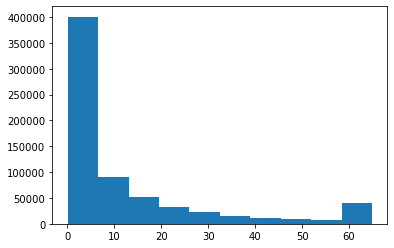

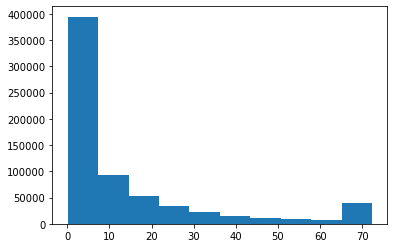

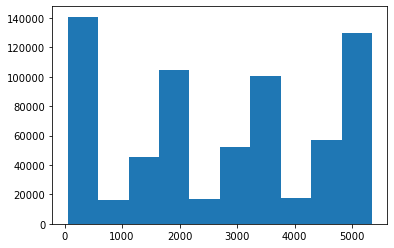

In [31]:
import numpy as np

al_clipped_features = np.zeros(df.shape)
for i, feature in enumerate(df.columns):
    clipped_features = np.clip(df[feature], a_min=np.percentile(a=df[feature], q=5), a_max=np.percentile(a=df[feature], q=95))
    al_clipped_features[:,i] =  clipped_features
    plt.hist(clipped_features)
    plt.show()
    plt.close()

Epoch 1/10
666/666 [==============================] - 1s 934us/step - loss: 2997605.2500
Epoch 2/10
666/666 [==============================] - 1s 905us/step - loss: 2657803.0000
Epoch 3/10
666/666 [==============================] - 1s 845us/step - loss: 2458185.0000
Epoch 4/10
666/666 [==============================] - 1s 832us/step - loss: 2356178.5000
Epoch 5/10
666/666 [==============================] - 1s 852us/step - loss: 2303312.0000
Epoch 6/10
666/666 [==============================] - 1s 847us/step - loss: 2181011.7500
Epoch 7/10
666/666 [==============================] - 1s 876us/step - loss: 2160336.0000
Epoch 8/10
666/666 [==============================] - 1s 882us/step - loss: 2145689.0000
Epoch 9/10
666/666 [==============================] - 1s 850us/step - loss: 2128842.0000
Epoch 10/10
666/666 [==============================] - 1s 854us/step - loss: 2124400.7500


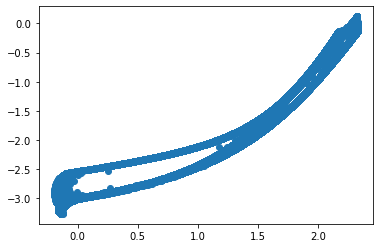

In [32]:
plot_autoencoder(al_clipped_features)

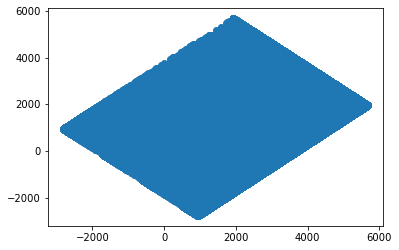

In [41]:
plot_pca(al_clipped_features)

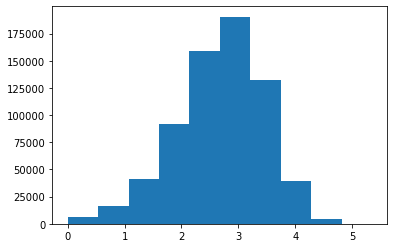

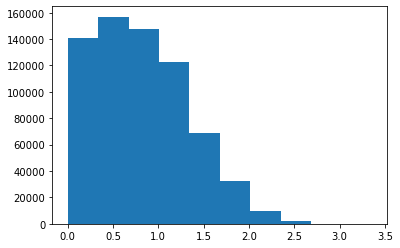

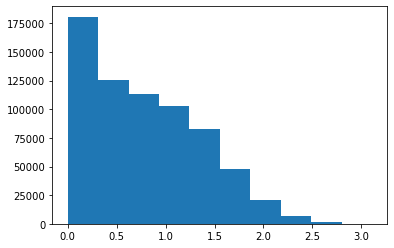

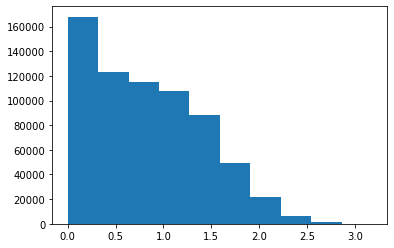

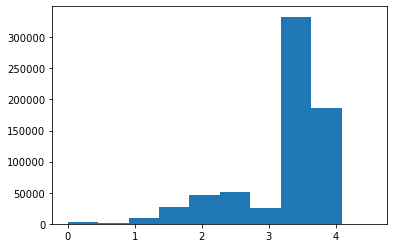

In [33]:
import numpy as np

all_log_features = np.zeros(df.shape)
for feature in df.columns:
    clipped_features = np.log10(df[feature] + 1)
    all_log_features[:,i] =  clipped_features

    plt.hist(clipped_features)
    plt.show()
    plt.close()

Epoch 1/10
666/666 [==============================] - 1s 900us/step - loss: 1.7079
Epoch 2/10
666/666 [==============================] - 1s 855us/step - loss: 1.6956
Epoch 3/10
666/666 [==============================] - 1s 988us/step - loss: 1.6955
Epoch 4/10
666/666 [==============================] - 1s 851us/step - loss: 1.6955
Epoch 5/10
666/666 [==============================] - 1s 849us/step - loss: 1.6955
Epoch 6/10
666/666 [==============================] - 1s 852us/step - loss: 1.6955
Epoch 7/10
666/666 [==============================] - 1s 842us/step - loss: 1.6955
Epoch 8/10
666/666 [==============================] - 1s 824us/step - loss: 1.6955
Epoch 9/10
666/666 [==============================] - 1s 836us/step - loss: 1.6955
Epoch 10/10
666/666 [==============================] - 1s 825us/step - loss: 1.6955


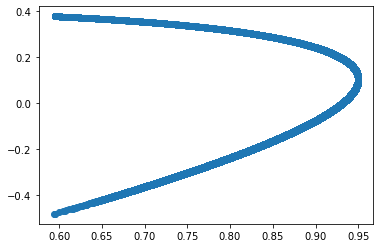

In [34]:
plot_autoencoder(all_log_features)

In [22]:
df_rank = df.rank()/float(len(df))

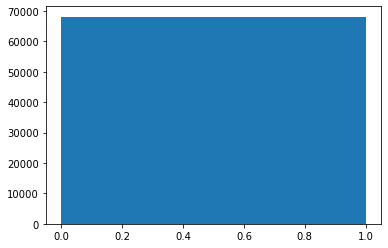

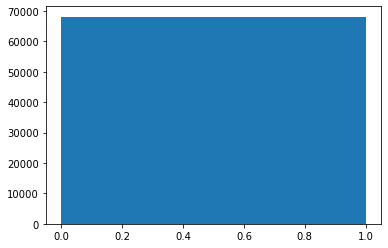

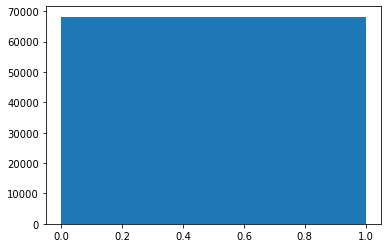

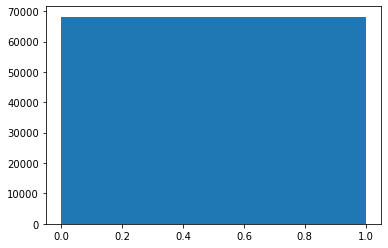

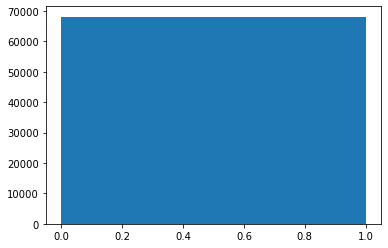

In [23]:
describe_data(df_rank, log_scale=False)

Epoch 1/10
666/666 [==============================] - 1s 885us/step - loss: 0.0295
Epoch 2/10
666/666 [==============================] - 1s 875us/step - loss: 0.0241
Epoch 3/10
666/666 [==============================] - 1s 834us/step - loss: 0.0240
Epoch 4/10
666/666 [==============================] - 1s 834us/step - loss: 0.0240
Epoch 5/10
666/666 [==============================] - 1s 836us/step - loss: 0.0240
Epoch 6/10
666/666 [==============================] - 1s 833us/step - loss: 0.0240
Epoch 7/10
666/666 [==============================] - 1s 855us/step - loss: 0.0240
Epoch 8/10
666/666 [==============================] - 1s 931us/step - loss: 0.0240
Epoch 9/10
666/666 [==============================] - 1s 915us/step - loss: 0.0240
Epoch 10/10
666/666 [==============================] - 1s 824us/step - loss: 0.0240


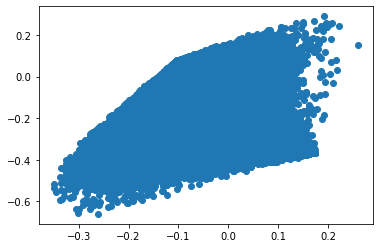

In [35]:
plot_autoencoder(df_rank)

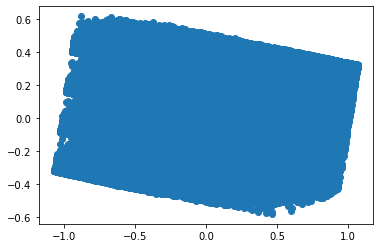

In [42]:
plot_pca(df_rank)

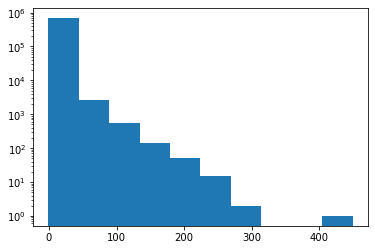

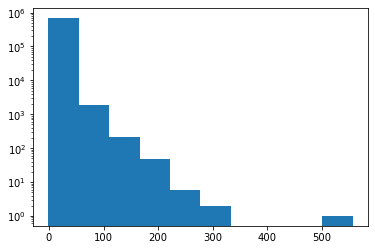

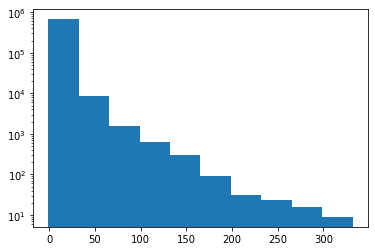

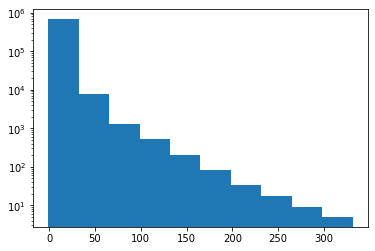

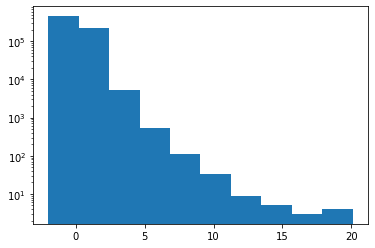

In [48]:
from scipy.stats import median_abs_deviation

all_MAD_features = np.zeros(df.shape)
for feature in df.columns:
    clipped_features = (df[feature] - np.median(df[feature])) / median_abs_deviation(df[feature])
    all_MAD_features[:,i] =  clipped_features

    plt.hist(clipped_features)
    plt.yscale('log')
    plt.show()
    plt.close()

Epoch 1/10
666/666 [==============================] - 1s 894us/step - loss: 0.2474
Epoch 2/10
666/666 [==============================] - 1s 843us/step - loss: 0.2425
Epoch 3/10
666/666 [==============================] - 1s 825us/step - loss: 0.2424
Epoch 4/10
666/666 [==============================] - 1s 824us/step - loss: 0.2423
Epoch 5/10
666/666 [==============================] - 1s 849us/step - loss: 0.2423
Epoch 6/10
666/666 [==============================] - 1s 825us/step - loss: 0.2423
Epoch 7/10
666/666 [==============================] - 1s 822us/step - loss: 0.2423
Epoch 8/10
666/666 [==============================] - 1s 825us/step - loss: 0.2423
Epoch 9/10
666/666 [==============================] - 1s 821us/step - loss: 0.2423
Epoch 10/10
666/666 [==============================] - 1s 834us/step - loss: 0.2423


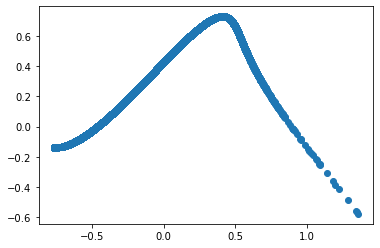

In [49]:
plot_autoencoder(all_MAD_features)

According to the paper: On normalization and algorithm selection for unsupervised outlier detection


Min-Max method is for outlier detection
normalization changes the nearest neighbors and densities of the data